In [23]:
import cv2
import json
import pprint
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

Shape :  (2988, 3984, 3)
Classes :  [ 2 13 15 17 19 21 24 25 27 30 35 39 44 45 46 47 48 50 54 55 57 61 62 65]
Classes_Instances :  [  512  3328  3840  4352  4864  4865  4866  4867  4868  4869  4870  4871
  5376  6144  6400  6912  7680  8960  8961  8962  8963  8964  8965  8966
  8967  9984  9985 11264 11520 11521 11522 11523 11524 11525 11526 11527
 11528 11529 11776 12032 12033 12034 12035 12036 12037 12038 12039 12040
 12041 12042 12043 12044 12045 12046 12047 12048 12049 12050 12051 12052
 12053 12054 12055 12056 12057 12058 12059 12288 12800 12801 13824 14080
 14081 14082 14083 14084 14085 14086 14087 14088 14089 14090 14091 14592
 14593 15616 15872 16640]


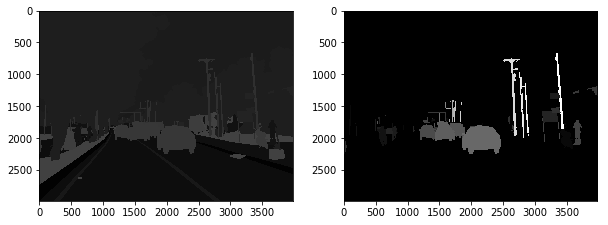

In [44]:
url = './_1AbvbARvB-5S0rAPN02Mg.png'
img = Image.open(url)
img_int8  = cv2.imread(url)
img_int16 = np.array(img, dtype=np.uint16)
(w, h) = img_int16.shape
print ('Shape : ', img_int8.shape)
print ('Classes : ', np.unique(img_int8))
print ('Classes_Instances : ', np.unique(img_int16))

f, axarr = plt.subplots(1,2, figsize = (10,10))
axarr[0].imshow(img_int8, cmap = 'gray')
axarr[1].imshow(np.array(img, dtype=np.uint8), cmap = 'gray')

In [48]:
with open('./merge__cityscapes_mapillary.json', 'r') as fp:
    converter_json = json.load(fp)
    pprint.pprint (converter_json)

{'mapillary_class': {'': {'cityscapes_class': '',
                          'cityscapes_label': '',
                          'mapillary_label': ''},
                     '52': {'cityscapes_class': '33',
                            'cityscapes_label': 'bicycle',
                            'mapillary_label': 'object--vehicle-bicycle'},
                     '54': {'cityscapes_class': '28',
                            'cityscapes_label': 'bus',
                            'mapillary_label': 'object--vehicle--bus'},
                     '55': {'cityscapes_class': '26',
                            'cityscapes_label': 'car',
                            'mapillary_label': 'object--vehicle--car'},
                     '56': {'cityscapes_class': '29',
                            'cityscapes_label': 'caravan',
                            'mapillary_label': 'object--vehicle--caravan'},
                     '57': {'cityscapes_class': '32',
                            'cityscapes_label': 'motorcyc

In [54]:
int8_int16_mapping = {}
for w_ in range(w):
    if w_ % 100 == 0: 
        print (w_, '/', w)
        if len(int8_int16_mapping):
            for key in int8_int16_mapping:
                print (key, np.unique(int8_int16_mapping[key]))
                
    for h_ in range(h):
        (r, g, b) = img_int8[w_, h_, :]
        if str(r) in converter_json['mapillary_class']:
            if r in int8_int16_mapping:
                int8_int16_mapping[r].append(img_int16[w_][h_])
            if r not in int8_int16_mapping:
                int8_int16_mapping[r] = [img_int16[w_][h_]]

for key in int8_int16_mapping:
    print (key, np.unique(int8_int16_mapping[key]))

0 / 2988
100 / 2988
200 / 2988
300 / 2988
400 / 2988
500 / 2988
600 / 2988
700 / 2988
800 / 2988
900 / 2988
1000 / 2988
1100 / 2988
1200 / 2988
1300 / 2988
1400 / 2988
1500 / 2988
1600 / 2988
1700 / 2988
61 [15616]
1800 / 2988
57 [14593]
61 [15616]
54 [13824]
55 [14088 14089 14090 14091]
1900 / 2988
57 [14592 14593]
61 [15616]
54 [13824]
55 [14080 14081 14082 14083 14084 14086 14087 14088 14089 14090 14091]
2000 / 2988
57 [14592 14593]
61 [15616]
54 [13824]
55 [14080 14081 14082 14083 14084 14086 14087 14088 14089 14090 14091]
2100 / 2988
57 [14592 14593]
61 [15616]
54 [13824]
55 [14080 14081 14082 14083 14084 14085 14086 14087 14088 14089 14090 14091]
2200 / 2988
57 [14592 14593]
61 [15616]
54 [13824]
55 [14080 14081 14082 14083 14084 14085 14086 14087 14088 14089 14090 14091]
2300 / 2988
57 [14592 14593]
61 [15616]
54 [13824]
55 [14080 14081 14082 14083 14084 14085 14086 14087 14088 14089 14090 14091]
2400 / 2988
57 [14592 14593]
61 [15616]
54 [13824]
55 [14080 14081 14082 14083 1408

In [55]:
57*256

14592

In [ ]:
58*256

14848